In [4]:
# We will do an end-to-end machine learning project. We will not delve into the details 
# of he machine learning model but treat it as a black-box for now. However, we will look 
# at lengths on data pre-processing, model selection as well as understanding the 
# performance of the model
#
# We will use the California housing data for this exercise
# Adapted from A. Geron, Hands-on Machine Learning with Scikit-Learn and TensorFlow, O’ Reilly, 2017

In [2]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [3]:
# Read the data into a dataframe
import pandas as pd

csv_path = os.path.join(local_path, "housing.csv")
data = pd.read_csv(csv_path)

In [4]:
# Let us get some information on the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Let us see what features there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Let us get some statistical information on each feature
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# We can dive more into a specific feature as well
data["housing_median_age"].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

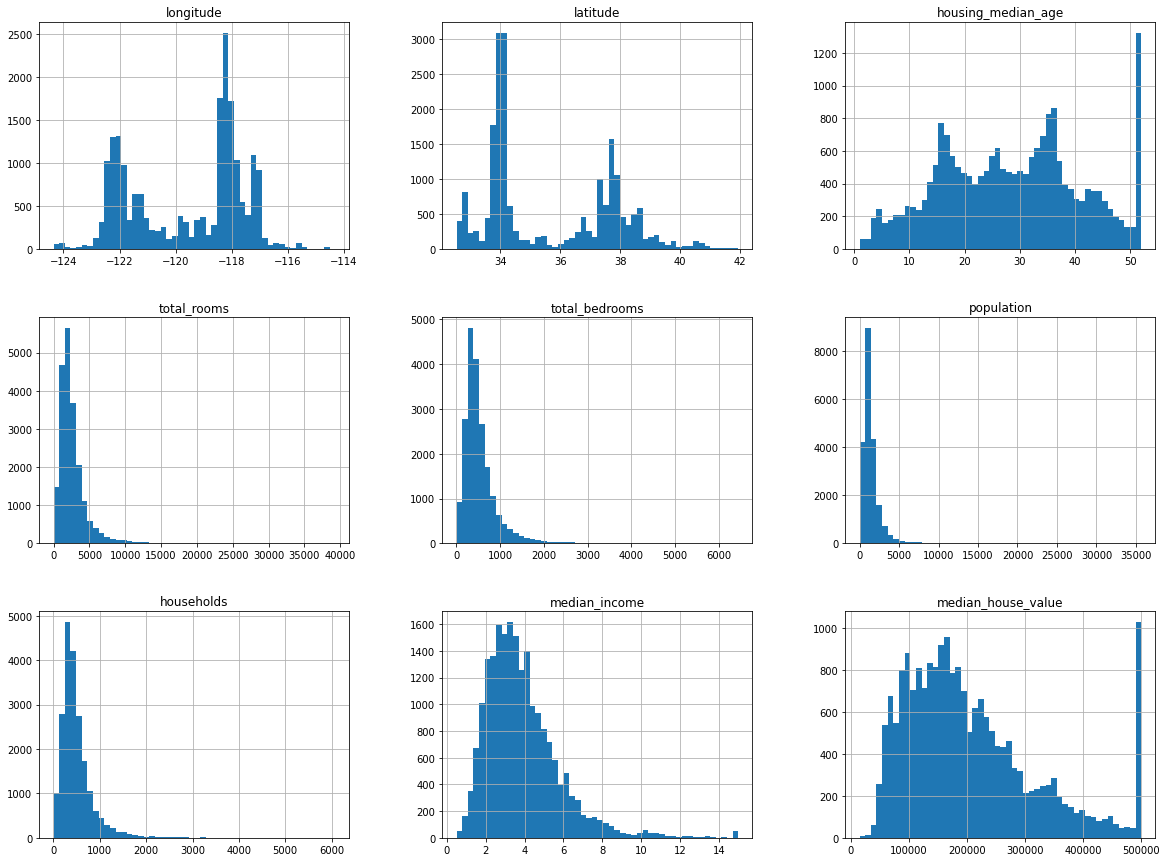

In [8]:
# We can also see the distribution of each feature. Recall our discussion in class on the 
# many things that the distribution suggests - multi-mode distribution, heavy tailed 
# distribution etc. 
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# Let us set up some data for training and some for testing
# Say 80% for training and 20% for testing

import numpy as np

shuffled_indices = np.random.permutation(len(data))
test_set_size = int(len(data) * 0.2)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

<AxesSubplot:>

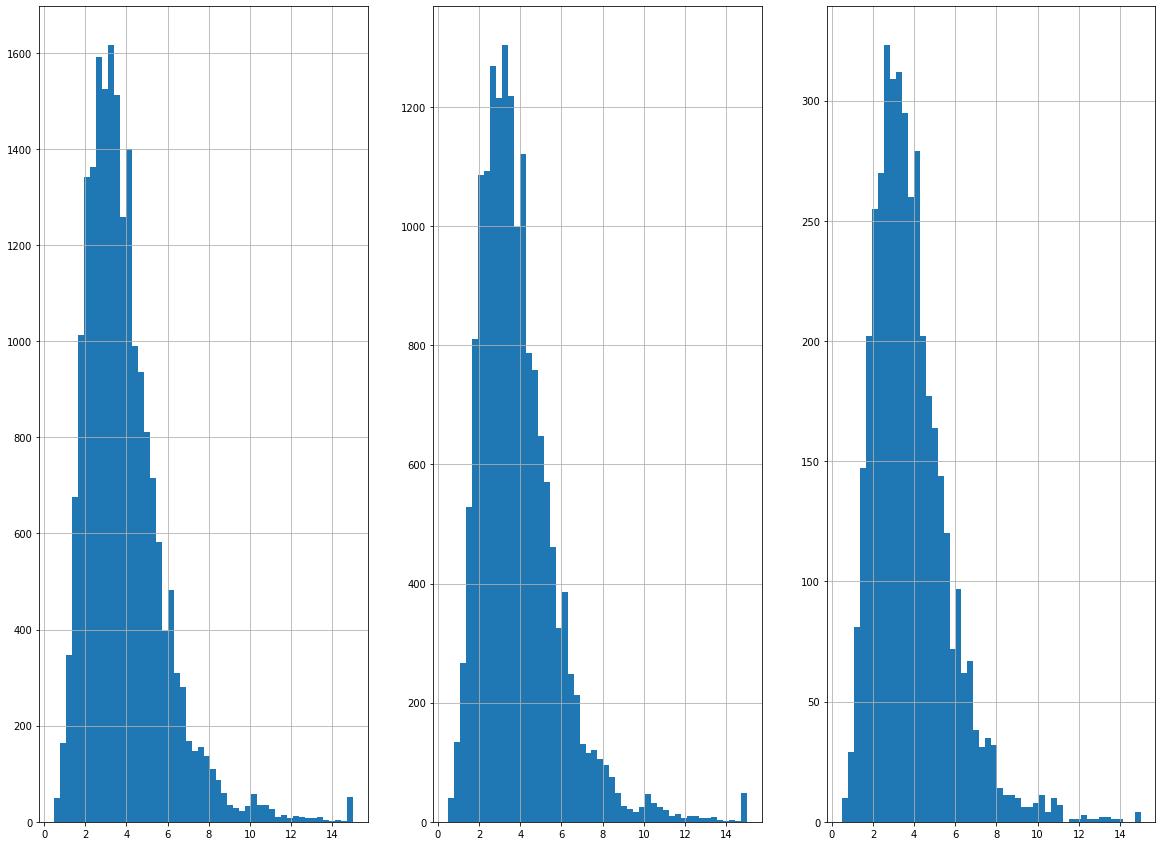

In [10]:
# This often leads to a problem. The distribution of the training data might not 
# resemble the distribution of the overall data
plt.subplot(1,3,1)
data["median_income"].hist(bins=50, figsize=(20,15))
plt.subplot(1,3,2)
train_data["median_income"].hist(bins=50, figsize=(20,15))
plt.subplot(1,3,3)
test_data["median_income"].hist(bins=50, figsize=(20,15))

In [11]:
# A better way to do this is through stratified sampling
# We will choose income for stratified sampling. Why? Because...

corr = data.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [12]:
# Create strata and then sample. 

data["income_cat"] = np.ceil(data["median_income"] / 1.5)
# Label those above 5 as 5
data["income_cat"].where(data["income_cat"] < 5, 5.0, inplace=True)

In [13]:
# Now do the stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_data = data.loc[train_index]
    strat_test_data = data.loc[test_index]

In [14]:
# Test data

strat_test_data["income_cat"].value_counts() / len(strat_test_data)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [15]:
# Original data

data["income_cat"].value_counts() / len(data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [16]:
# We now prepare the data for machine learning

train_data_i = strat_train_data.drop("median_house_value", axis=1) 
train_data_o = strat_train_data["median_house_value"].copy()

In [17]:
train_data_i.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [18]:
# Let us check if there are any missing values. 

incomplete_rows = train_data_i[train_data_i.isnull().any(axis=1)].head()
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [19]:
# We can drop the missing rows

incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [20]:
# We can drop the attribute

incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2.0
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4.0
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4.0
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2.0
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3.0


In [21]:
# We can fill in missing values with somethign like the median. Ideally
# you can fill based on regressing against the other variables

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
train_data_i_num = train_data_i.drop('ocean_proximity', axis=1) # median does not exist for categorical attribute


In [22]:
imputer.fit(train_data_i_num)

SimpleImputer(strategy='median')

In [23]:
imputer.fit

<bound method SimpleImputer.fit of SimpleImputer(strategy='median')>

In [24]:
X = imputer.transform(train_data_i_num)

In [25]:
# We can one-hot encode the categorical variable

train_data_i_cat = train_data_i[['ocean_proximity']]

In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_data_i_cat_encoded = ordinal_encoder.fit_transform(train_data_i_cat)
train_data_i_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [27]:
# A powerful thing that can be done is a pipeline which has a sequence of 
# steps. So, let us fill missing values with the median and scale 
# everything to be in [-1,+1]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_data_i_num_tr = num_pipeline.fit_transform(train_data_i_num)
train_data_i_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744, -0.95445595],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.89030518],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.95445595],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.00620224],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139, -0.00620224],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865, -0.00620224]])

In [28]:
# Likewise we can do a pipeline for transforming the categorical
# attribute to one-hot encoding and create a combo pipeline in one shot

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(train_data_i_num)
cat_attribs = list(train_data_i_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_data_i_prepared = full_pipeline.fit_transform(train_data_i)

In [29]:
train_data_i_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_i_prepared, train_data_o)

LinearRegression()

In [34]:
# Let us see the prediction

some_data = train_data_i.iloc[:5]
some_labels = train_data_o.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [205841.96139906 329060.05217695 205219.96047357  61859.01340291
 196908.23636333]


In [35]:
# These are the desired values

print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [36]:
# Check performance on the testing data

from sklearn.metrics import mean_squared_error

X_test = strat_test_data.drop("median_house_value", axis=1) 
y_test = strat_test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions) 
final_rmse = np.sqrt(final_mse)


In [37]:
final_rmse

67237.66817493214